# RQ1.1: 
I will choose the Bronx and Manhatten because these boroughs have much different average incomes. We will see if there is some significant difference in predictive power between them.

# RQ1.2: 
H0: If we measure the liklihood that home sale prices in Manahatten and the Bronx in 2018, 2019, and 2020 are drawn from the same sample, we will find that 2018 and 2019 sale prices have a higher liklihood of being drawn from the same sample than 2020 sale prices.

How we will invalidate this: we will test to see which distribution the housing prices follow, then apply an appropriate statistical test to measure the liklihood that two distributions are drawn from the same sample. We will apply this to compare 2018 and 2019 sale prices, then 2018 and 2020 as well as 2019 and 2020. If we find that 2018 and 2019 are more likly to be drawn from the same sample than 2020, the null hypothesis will be invalidated.

I suspect that housing prices will be positively skewed, and I am going to be comparing two groups (housing prices of 2018+2019 vs housing prices of 2020), so I will use the Wilcoxen Mann-Whitney t-test. Below I will plot the housing prices as a histogram to confirm that it is positively skewed and that I consequently must use the selected t-test.
# RQ1.3

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot
import scipy.stats as st
import matplotlib.pyplot as plt
import plotly as pl

In [2]:
def remove_dollarsign(string_butmaybenotastring): #the purpose of this function is to remove the elements of
    if type(string_butmaybenotastring) is str: #prices that prevent the price from being converted into a float
        string_butmaybenotastring = string_butmaybenotastring.replace("$","") #I could have probably found a package
        string_butmaybenotastring = string_butmaybenotastring.replace(",","") #which does this, but I like to home
        string_butmaybenotastring = string_butmaybenotastring.replace(" ","") #cook these things
    return string_butmaybenotastring
#As you can see, the function above checks if the input is a string. If has spaces, $'s, and commas removed
#This allows me to convert it to a float

#This function will be used to 
def make_distribution(dataframe,saleprice_column,clip_lower,clip_upper):
    dataframe[saleprice_column] = dataframe[saleprice_column].apply(remove_dollarsign) #applies a function written below
    dataframe[saleprice_column] = dataframe[saleprice_column].apply(float) #turns numbers into floats
    dataframe = dataframe[dataframe[saleprice_column] < clip_upper]
    dataframe = dataframe[dataframe[saleprice_column] > clip_lower]
    prices = list(dataframe[saleprice_column])
    return prices,dataframe

In [3]:
#loading in all of our sets of data
bronx_2018 = pd.read_csv("2018_bronx.csv")
bronx_2018 = bronx_2018[bronx_2018["SALE PRICE\n"] != 0]
bronx_2018 = bronx_2018[bronx_2018["SALE PRICE\n"] != "NaN"]

manhatten_2018 = pd.read_csv("2018_manhattan.csv")
manhatten_2018 = manhatten_2018[manhatten_2018["SALE PRICE\n"] != 0]
manhatten_2018 = manhatten_2018[manhatten_2018["SALE PRICE\n"] != "NaN"]

bronx_2019 = pd.read_csv("2019_bronx.csv")
bronx_2019 = bronx_2019[bronx_2019["SALE PRICE\n"] != 0]
bronx_2019 = bronx_2019[bronx_2019["SALE PRICE\n"] != "NaN"]

manhatten_2019 = pd.read_csv("2019_manhattan.csv")
manhatten_2019 = manhatten_2019[manhatten_2019["SALE PRICE\n"] != 0]
manhatten_2019 = manhatten_2019[manhatten_2019["SALE PRICE\n"] != "NaN"]

bronx_2020 = pd.read_csv("2020_bronx.csv")
bronx_2020 = bronx_2020[bronx_2020[" SALE PRICE "] != 0]
bronx_2020 = bronx_2020[bronx_2020[" SALE PRICE "] != "NaN"]

manhatten_2020 = pd.read_csv("2020_manhattan.csv")
manhatten_2020 = manhatten_2020[manhatten_2020[" SALE PRICE "] != 0]
manhatten_2020 = manhatten_2020[manhatten_2020[" SALE PRICE "] != "NaN"]

Text(0, 0.5, 'Count')

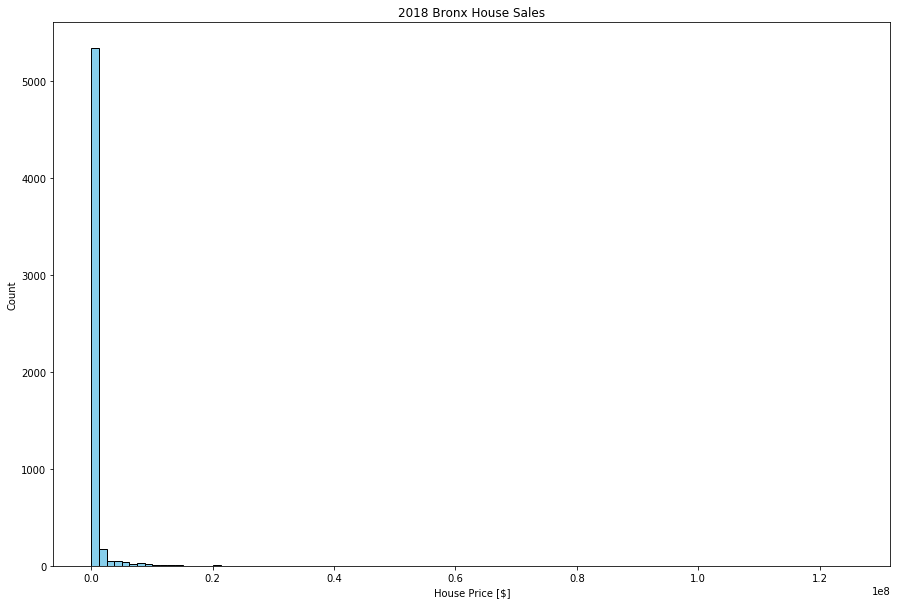

In [4]:
bronx_2018 = pd.read_csv("2018_bronx.csv")
data,bronx_2018 = make_distribution(bronx_2018,"SALE PRICE\n",0,500000000) #arbitrary number to catch all high
                                                        #price homes
plt.figure(figsize = (15,10))    
_, bins, _ = plt.hist(data, 100, color = "skyblue", ec="k")
plt.title("2018 Bronx House Sales")
plt.xlabel("House Price [$]")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

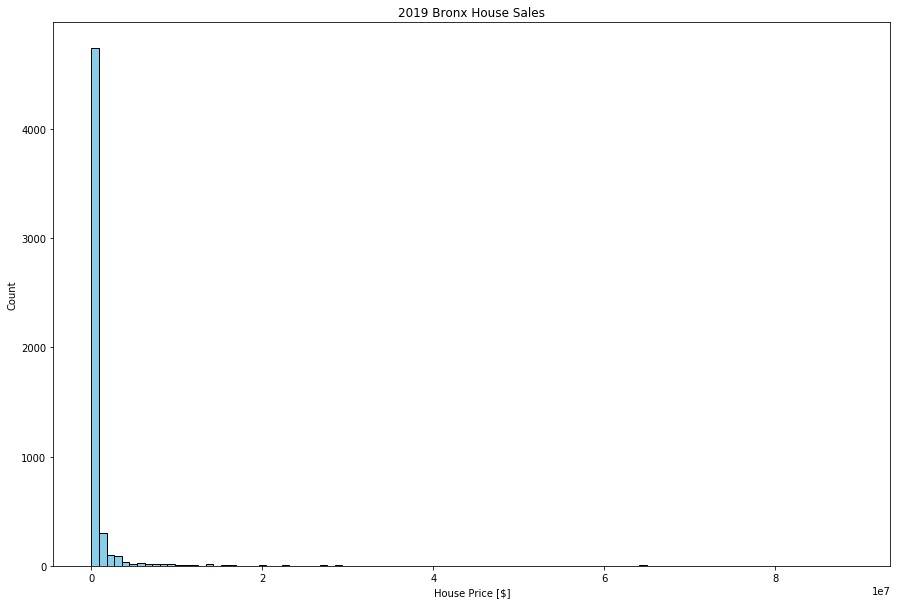

In [5]:
bronx_2019 = pd.read_csv("2019_bronx.csv")
data,bronx_2019 = make_distribution(bronx_2019,"SALE PRICE\n",0,500000000)

plt.figure(figsize = (15,10))    
_, bins, _ = plt.hist(data, 100, color = "skyblue", ec="k")
plt.title("2019 Bronx House Sales")
plt.xlabel("House Price [$]")
plt.ylabel("Count")

When we plot this, we find that there is a significant grouping at 0. This makes me think that there is a problem with the dataset, where some entries are simply "0". Of course these homes were not being sold for zero dollars. If they were, I'd be a landlord in New York right now! To test this hypothesis (that they are not simply very inexpensive homes), I will set a lower limit to 500. If it eliminates most of the bar, we can assume that they are either misentries or some special case of data which we are not particularly interested in for the purposes of this activity.

It also appears that there are some very high-price homes being sold in the bronx that are interfering with the plotting. In order to be true to this distribution without needlessly cutting out outliers, I will fit the distribution, then remove values which far exceed the fit (i.e, outliers from the fit). This will allow us to more accurrately calculate changes in averages.

Text(0, 0.5, 'Count')

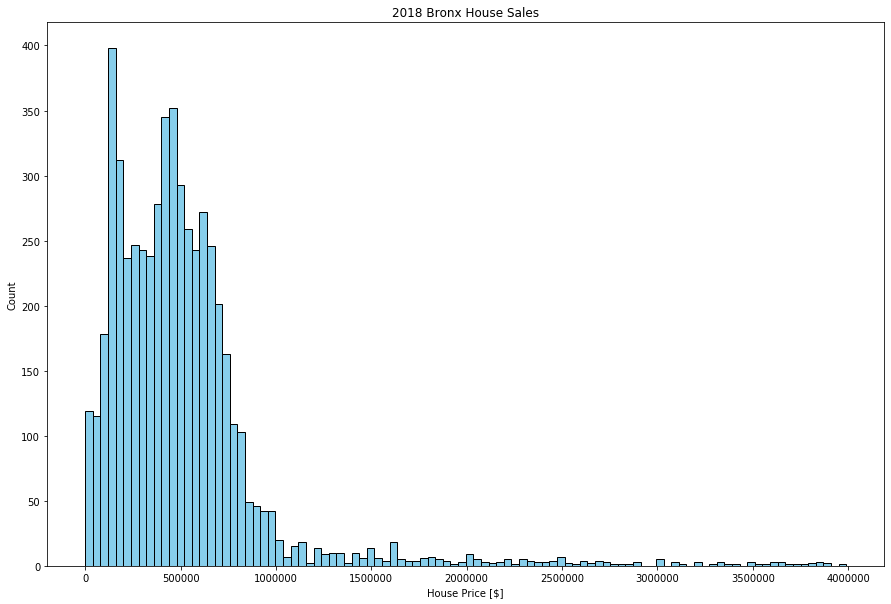

In [6]:
bronx_2018 = pd.read_csv("2018_bronx.csv")
bronx_2018_houseprices,bronx_2018 = make_distribution(bronx_2018,"SALE PRICE\n",500,4000000)

plt.figure(figsize = (15,10))    
_, bins, _ = plt.hist(bronx_2018_houseprices, 100, color = "skyblue", ec="k")
plt.title("2018 Bronx House Sales")
plt.xlabel("House Price [$]")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

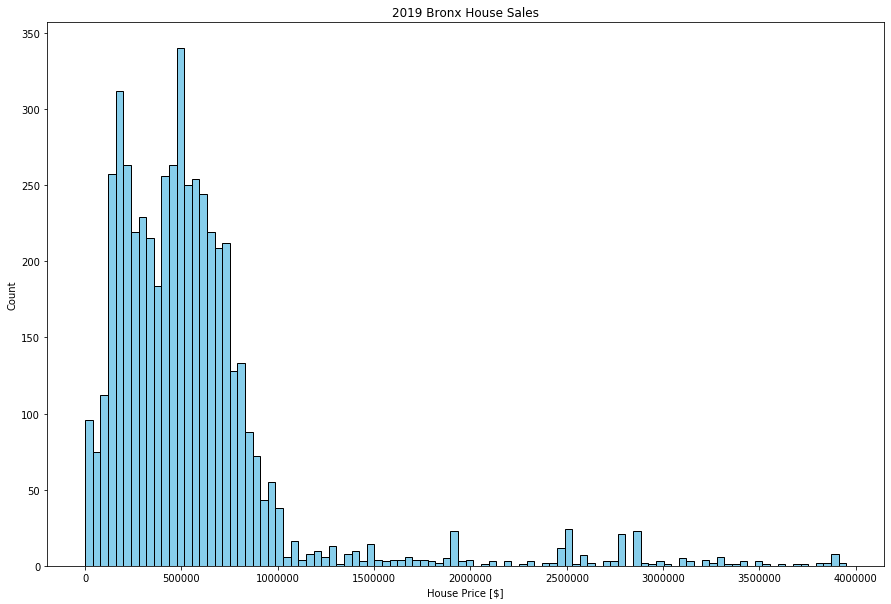

In [7]:
bronx_2019 = pd.read_csv("2019_bronx.csv")
bronx_2019_houseprices,bronx_2019 = make_distribution(bronx_2019,"SALE PRICE\n",500,4000000)

plt.figure(figsize = (15,10))    
_, bins, _ = plt.hist(bronx_2019_houseprices, 100, color = "skyblue", ec="k")
plt.title("2019 Bronx House Sales")
plt.xlabel("House Price [$]")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

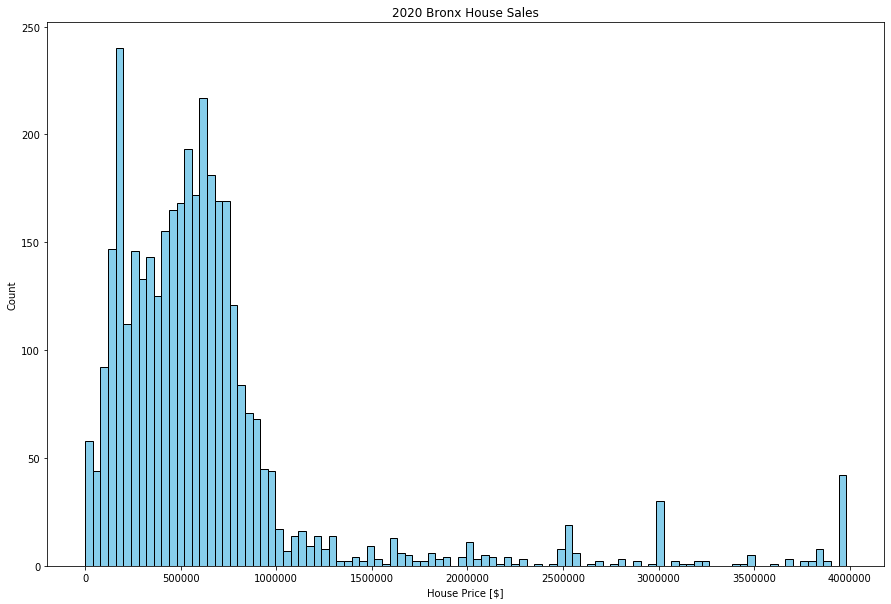

In [8]:
bronx_2020 = pd.read_csv("2020_bronx.csv")
bronx_2020_houseprices,bronx_2020 = make_distribution(bronx_2020," SALE PRICE ",500,4000000)

plt.figure(figsize = (15,10))    
_, bins, _ = plt.hist(bronx_2020_houseprices, 100, color = "skyblue", ec="k")
plt.title("2020 Bronx House Sales")
plt.xlabel("House Price [$]")
plt.ylabel("Count")

As we can see, there is a positive skew on our data. This indicates that a Mann-Whitney test is an appropriate measure of statistical significance.

In [9]:
st.mannwhitneyu(bronx_2019_houseprices, bronx_2020_houseprices)

MannwhitneyuResult(statistic=8436233.5, pvalue=1.5075926375152036e-11)

In [10]:
st.mannwhitneyu(bronx_2018_houseprices, bronx_2020_houseprices)

MannwhitneyuResult(statistic=8274922.0, pvalue=5.017252556839e-38)

In [11]:
st.mannwhitneyu(bronx_2018_houseprices, bronx_2019_houseprices)

MannwhitneyuResult(statistic=12813277.5, pvalue=2.5507233584325964e-12)

As we can see, there is a greater difference when comparing 2018 and 2019 to 2020 (U = 8274922 and 8436233, respectively) than when comparing 2018 to 2019 (U = 12813277). In each of these tests, we find that our p value is significantly smaller than 0.05, which indicates that our results are statistically significant. We will repeat this process for Manhatten next.

Text(0, 0.5, 'Count')

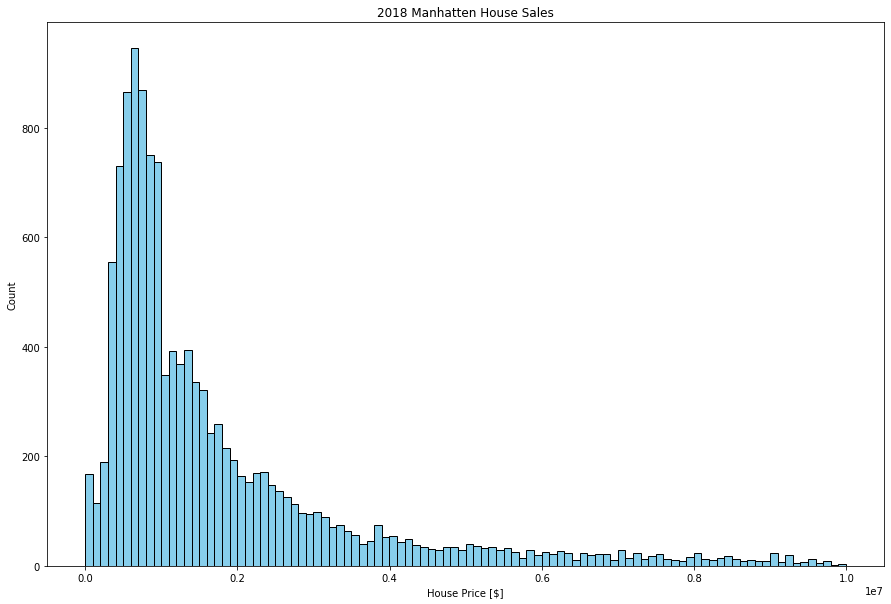

In [12]:
manhatten_2018 = pd.read_csv("2018_manhattan.csv")
manhatten_2018_houseprices,manhatten_2018 = make_distribution(manhatten_2018,"SALE PRICE\n",500,10000000)

plt.figure(figsize = (15,10))    
_, bins, _ = plt.hist(manhatten_2018_houseprices, 100, color = "skyblue", ec="k")
plt.title("2018 Manhatten House Sales")
plt.xlabel("House Price [$]")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

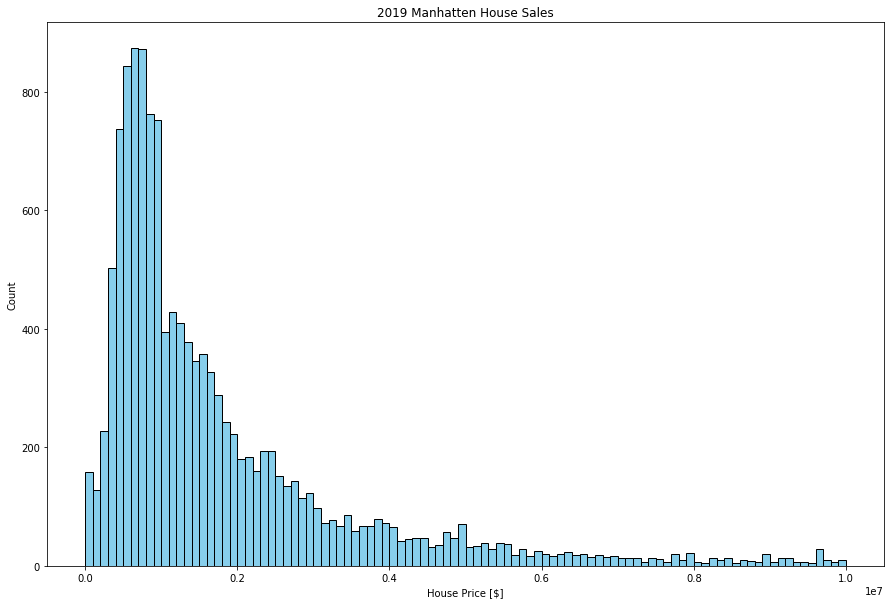

In [13]:
manhatten_2019 = pd.read_csv("2019_manhattan.csv")
manhatten_2019_houseprices,manhatten_2019 = make_distribution(manhatten_2019,"SALE PRICE\n",500,10000000)

plt.figure(figsize = (15,10))    
_, bins, _ = plt.hist(manhatten_2019_houseprices, 100, color = "skyblue", ec="k")
plt.title("2019 Manhatten House Sales")
plt.xlabel("House Price [$]")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

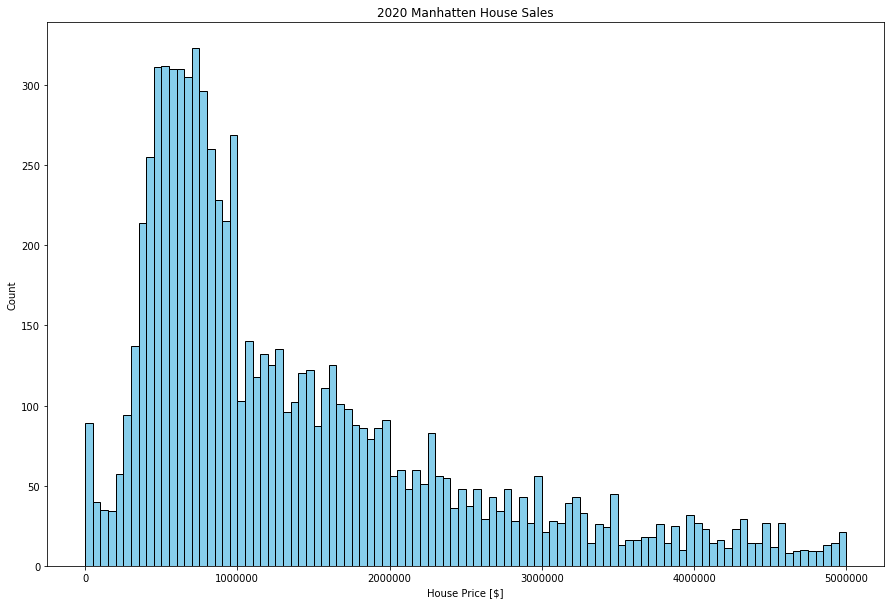

In [14]:
manhatten_2020 = pd.read_csv("2020_manhattan.csv")
manhatten_2020_houseprices,manhatten_2020 = make_distribution(manhatten_2020," SALE PRICE ",500,5000000)
plt.figure(figsize = (15,10))    
_, bins, _ = plt.hist(manhatten_2020_houseprices, 100, color = "skyblue", ec="k")
plt.title("2020 Manhatten House Sales")
plt.xlabel("House Price [$]")
plt.ylabel("Count")

In [15]:
st.mannwhitneyu(manhatten_2019_houseprices, manhatten_2020_houseprices)

MannwhitneyuResult(statistic=46920782.0, pvalue=8.873650849322089e-28)

In [16]:
st.mannwhitneyu(manhatten_2018_houseprices,manhatten_2020_houseprices)

MannwhitneyuResult(statistic=46250610.0, pvalue=2.674183987557699e-13)

In [17]:
st.mannwhitneyu(manhatten_2018_houseprices,manhatten_2019_houseprices)

MannwhitneyuResult(statistic=76963237.5, pvalue=7.76706191245139e-05)

# RQ1.4:
We find a similar trend in Manhatten. There is more similarity between 2018 and 2019 house prices than between 2019 and 2020 house prices. Unfortunately the difference in house prices between 2018 and 2020 is not statistically significant (p>0.05), but the U value is close to that which was measured when comparing 2019 and 2020, which indicates that there is likely a similar trend.

In conclusion, we have found that there is indeed a difference between the sale price of homes in Manhatten and the Bronx in 2018-2019 and 2020. While we cannot certainly say this is a consequence of covid-19, it is quite probable since the economic impacts of policy to reduce the spread of covid-19 have been significant.


# RQ2.1:
This is something I do not totally understand. Are we doing this before we preform our regression, while we are still analyzing the characteristics of the data? I feel as though this may reduce the p value of our findings. I am going to split off the 10% while doing the regression, but analyze the full dataset while looking for important characteristics.
# RQ2.2:
In order to determine which properties of houses are related to price, I will group the data set by each characteristic, then visualize the impact by setting the y axis as house price and the x axis as that characteristic. If that characteristic is numerical or ordinal, I will put it in order from lowest to highest. If there is no (sensible) numerical way of representing that characteristic, I will simplely randomly choose the position for the x-axis.

Here are the factors I will immediately eliminate: 

- address. The address is too specific. I could get around this issue, but it would require a rather complex mapper which organizes the homes into groups based on how close they are to each other, but this is already done in the neighborhood and block attribute.

- Borough. The borough is, of course, all the same in the Bronx. I will be seperately studying the effects of covid-19 on each borough, so this attribute is not necessary in the individual regressions.

- Basement. I checked and the none of the datapoints have a basement.

- Apartment Number. Aaprtment number is a totally arbitrary value that does not represent some kind of worth, so this is a useless datapoint.

In [18]:
def remove_commas(string_):
    if type(string_) is str:
        if "," in string_:
            string_ = string_.replace(',', '')
    return string_

In [19]:
manhatten_2020 = pd.read_csv("2020_manhattan.csv")
manhatten_2020_houseprices,manhatten_2020 = make_distribution(manhatten_2020," SALE PRICE ",500,10000000)

#deletes our undesireable columns
del manhatten_2020["EASE-MENT"]
del manhatten_2020["APARTMENT NUMBER"]
del manhatten_2020["BOROUGH"]
del manhatten_2020["ADDRESS"]

manhatten_2020["YEAR BUILT"] = manhatten_2020["YEAR BUILT"].dropna() #dropping empty datapoints
#the above method does not remove all, so I need to convert them all to string then remove
#strings of "nan"
manhatten_2020["YEAR BUILT"] = manhatten_2020["YEAR BUILT"].apply(str) 
manhatten_2020 = manhatten_2020[manhatten_2020["YEAR BUILT"] != "nan"]
#must convert strings to floats, then integers because they have a decimal point
manhatten_2020["YEAR BUILT"] = manhatten_2020["YEAR BUILT"].apply(float)
manhatten_2020["YEAR BUILT"] = manhatten_2020["YEAR BUILT"].apply(int)
#this rounds to the nearest decade
manhatten_2020["YEAR BUILT"] = manhatten_2020["YEAR BUILT"].round(decimals=-1)
manhatten_2020["BLOCK"] = manhatten_2020["BLOCK"].round(decimals=-1)
manhatten_2020["LOT"] = manhatten_2020["LOT"].round(decimals=-1)

manhatten_2020["LAND SQUARE FEET"] = manhatten_2020["LAND SQUARE FEET"].apply(remove_commas)
manhatten_2020["LAND SQUARE FEET"] = manhatten_2020["LAND SQUARE FEET"].apply(float)
manhatten_2020["LAND SQUARE FEET"] = manhatten_2020["LAND SQUARE FEET"][manhatten_2020["LAND SQUARE FEET"] < 20000]
manhatten_2020["LAND SQUARE FEET"] = manhatten_2020["LAND SQUARE FEET"].round(decimals=-2)

manhatten_2020["GROSS SQUARE FEET"] = manhatten_2020["GROSS SQUARE FEET"].apply(remove_commas)
manhatten_2020["GROSS SQUARE FEET"] = manhatten_2020["GROSS SQUARE FEET"].apply(float)
manhatten_2020["GROSS SQUARE FEET"] = manhatten_2020["GROSS SQUARE FEET"][manhatten_2020["GROSS SQUARE FEET"] < 20000]
manhatten_2020["GROSS SQUARE FEET"] = manhatten_2020["GROSS SQUARE FEET"].round(decimals=-2)

manhatten_2020["YEAR BUILT"] = manhatten_2020["YEAR BUILT"][manhatten_2020["YEAR BUILT"] > 1500]


manhatten_2020[" SALE PRICE "] = manhatten_2020[" SALE PRICE "].apply(float)

In [20]:
manhatten_2020

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
2,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,380.0,70.0,C0,10009.0,3,0.0,3,2400.0,3100.0,1900.0,1.0,C0,4350000.0,2020-07-16
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,370.0,0.0,C7,10009.0,8,2.0,10,1500.0,6900.0,1900.0,2.0,C7,3672530.0,2020-11-24
6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,380.0,30.0,C4,10009.0,19,0.0,19,2800.0,13200.0,1920.0,2.0,C4,290000.0,2020-02-07
7,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,380.0,30.0,C4,10009.0,19,0.0,19,2800.0,13200.0,1920.0,2.0,C4,2500.0,2020-02-11
8,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,380.0,30.0,C4,10009.0,19,0.0,19,2800.0,13200.0,1920.0,2.0,C4,125375.0,2020-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180.0,1430.0,R4,10033.0,1,NaN,1,NaN,NaN,1950.0,2.0,R4,505000.0,2020-12-03
11956,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180.0,1440.0,R4,10033.0,1,NaN,1,NaN,NaN,1950.0,2.0,R4,560000.0,2020-12-14
11960,WASHINGTON HEIGHTS UPPER,32 HOSPITAL AND HEALTH FACILITIES,4,2180.0,100.0,I5,10040.0,0,1.0,1,10000.0,9300.0,1930.0,4.0,I5,6600000.0,2020-12-11
11962,WASHINGTON HEIGHTS UPPER,37 RELIGIOUS FACILITIES,4,2170.0,120.0,M1,10040.0,0,1.0,1,NaN,5200.0,1960.0,4.0,M1,8000000.0,2020-08-20


In [21]:
NEIGHBORHOOD1 = manhatten_2020.groupby(["NEIGHBORHOOD"])[" SALE PRICE "].sem()
NEIGHBORHOOD = manhatten_2020.groupby(["NEIGHBORHOOD"], as_index=False)[" SALE PRICE "].mean()

BUILDING_CLASS_CATEGORY1 = manhatten_2020.groupby(["BUILDING CLASS CATEGORY"])[" SALE PRICE "].sem()
BUILDING_CLASS_CATEGORY = manhatten_2020.groupby("BUILDING CLASS CATEGORY", as_index=False).mean()

TAX_CLASS_AT_PRESENT1 = manhatten_2020.groupby(["TAX CLASS AT PRESENT"])[" SALE PRICE "].sem()
TAX_CLASS_AT_PRESENT = manhatten_2020.groupby("TAX CLASS AT PRESENT", as_index=False).mean()

BLOCK1 = manhatten_2020.groupby(["BLOCK"])[" SALE PRICE "].sem()
BLOCK = manhatten_2020.groupby("BLOCK", as_index=False).mean()

LOT1 = manhatten_2020.groupby(["LOT"])[" SALE PRICE "].sem()
LOT = manhatten_2020.groupby("LOT", as_index=False).mean()

ZIP_CODE1 = manhatten_2020.groupby(["ZIP CODE"])[" SALE PRICE "].sem()
ZIP_CODE = manhatten_2020.groupby("ZIP CODE", as_index=False).mean()

RESIDENTIAL_UNITS1 = manhatten_2020.groupby(["RESIDENTIAL UNITS"])[" SALE PRICE "].sem()
RESIDENTIAL_UNITS = manhatten_2020.groupby("RESIDENTIAL UNITS", as_index=False).mean()

COMMERICIAL_UNITS1 = manhatten_2020.groupby(["COMMERCIAL UNITS"])[" SALE PRICE "].sem()
COMMERICIAL_UNITS = manhatten_2020.groupby("COMMERCIAL UNITS", as_index=False).mean()

TOTAL_UNITS1 = manhatten_2020.groupby(["TOTAL UNITS"])[" SALE PRICE "].sem()
TOTAL_UNITS = manhatten_2020.groupby("TOTAL UNITS", as_index=False).mean()

LAND_SQUARE_FEET1 = manhatten_2020.groupby(["LAND SQUARE FEET"])[" SALE PRICE "].sem()
LAND_SQUARE_FEET = manhatten_2020.groupby("LAND SQUARE FEET", as_index=False).mean()

GROSS_SQUARE_FEET1 = manhatten_2020.groupby(["GROSS SQUARE FEET"])[" SALE PRICE "].sem()
GROSS_SQUARE_FEET = manhatten_2020.groupby("GROSS SQUARE FEET", as_index=False).mean()

YEAR_BUILT1 = manhatten_2020.groupby(["YEAR BUILT"])[" SALE PRICE "].sem()
YEAR_BUILT = manhatten_2020.groupby("YEAR BUILT", as_index=False).mean()

TAX_CLASS_AT_TIME_OF_SALE1 = manhatten_2020.groupby(["TAX CLASS AT TIME OF SALE"])[" SALE PRICE "].sem()
TAX_CLASS_AT_TIME_OF_SALE = manhatten_2020.groupby("TAX CLASS AT TIME OF SALE", as_index=False).mean()

BUILDING_CLASS_AT_TIME_OF_SALE1 = manhatten_2020.groupby(["BUILDING CLASS AT TIME OF SALE"])[" SALE PRICE "].sem()
BUILDING_CLASS_AT_TIME_OF_SALE = manhatten_2020.groupby("BUILDING CLASS AT TIME OF SALE", as_index=False).mean()


Text(0.5, 1.0, 'Sale Prices By Neighborhood')

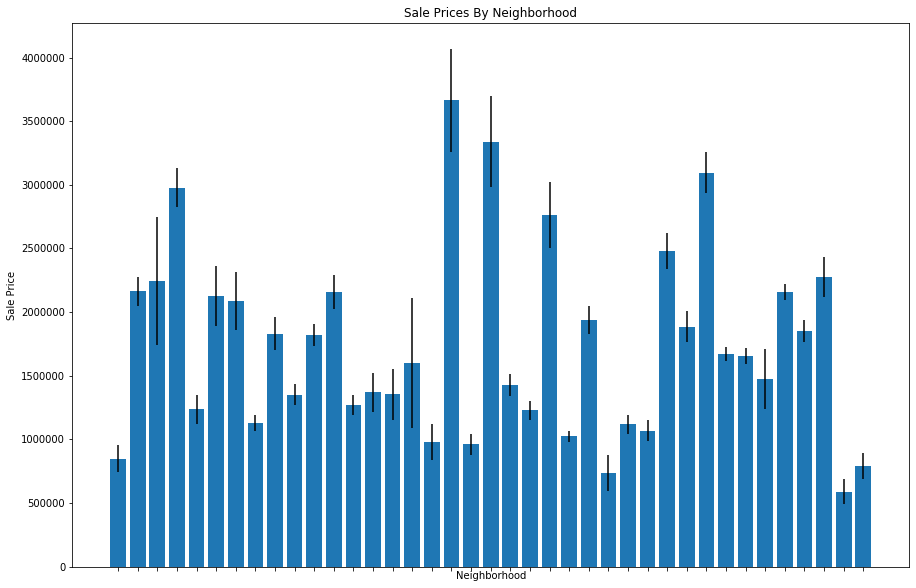

In [22]:
plt.figure(figsize = (15,10))
plt.bar(NEIGHBORHOOD["NEIGHBORHOOD"],NEIGHBORHOOD[" SALE PRICE "],yerr = NEIGHBORHOOD1)
plt.tick_params(axis = "x", which = "both", labelbottom = False, top = False)
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.title("Sale Prices By Neighborhood")

Neighborhood is clearly a good predictor of price.

There are many blocks, but it appears that omitting blocks and keeping neighborhoods is the best appraoch. We have far more datapoints in the block category, but fewer datapoints per category (of course). This results is a high error on the mean, which indicates to me that we will see poor prediction if we use block.

Text(0.5, 1.0, 'Sale Prices By Tax Class')

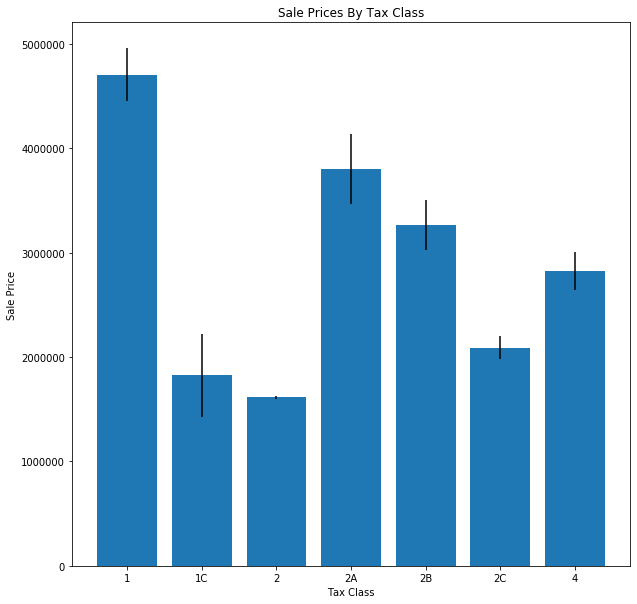

In [24]:
plt.figure(figsize = (10,10))
plt.bar(TAX_CLASS_AT_PRESENT["TAX CLASS AT PRESENT"],TAX_CLASS_AT_PRESENT[" SALE PRICE "],yerr = TAX_CLASS_AT_PRESENT1)
plt.xlabel("Tax Class")
plt.ylabel("Sale Price")
plt.title("Sale Prices By Tax Class")

This looks like a good predictor!

Text(0.5, 1.0, 'Sale Prices By Building Class')

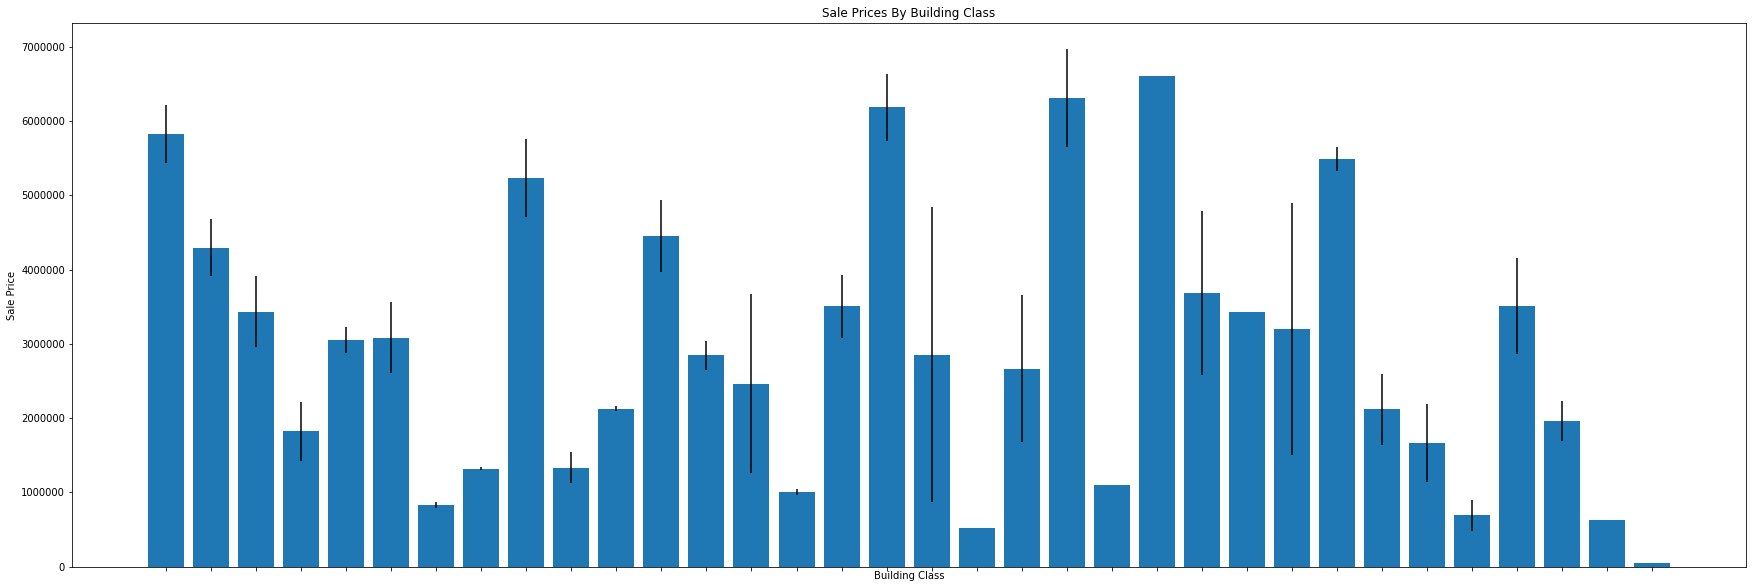

In [25]:
plt.figure(figsize = (30,10))
plt.bar(BUILDING_CLASS_CATEGORY["BUILDING CLASS CATEGORY"],BUILDING_CLASS_CATEGORY[" SALE PRICE "],yerr = BUILDING_CLASS_CATEGORY1)
plt.tick_params(axis = "x", which = "both", labelbottom = False, top = False)
plt.xlabel("Building Class")
plt.ylabel("Sale Price")
plt.title("Sale Prices By Building Class")

This appears to be a good predictor but not fantastic. There is high variance in some building classes, but I think it will still be a useful predictor.

Text(0.5, 1.0, 'Sale Prices By Number of Residential Units')

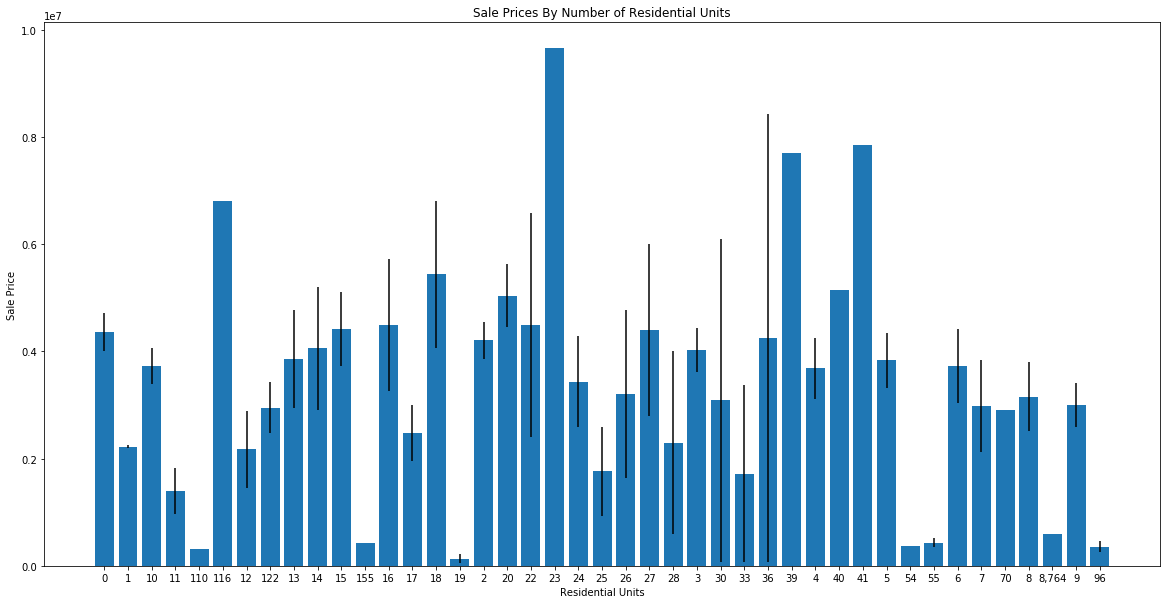

In [27]:
plt.figure(figsize = (20,10))
plt.bar(RESIDENTIAL_UNITS["RESIDENTIAL UNITS"],RESIDENTIAL_UNITS[" SALE PRICE "],yerr = RESIDENTIAL_UNITS1)
plt.xlabel("Residential Units")
plt.ylabel("Sale Price")
plt.title("Sale Prices By Number of Residential Units")

Text(0.5, 1.0, 'Sale Prices By Year Built')

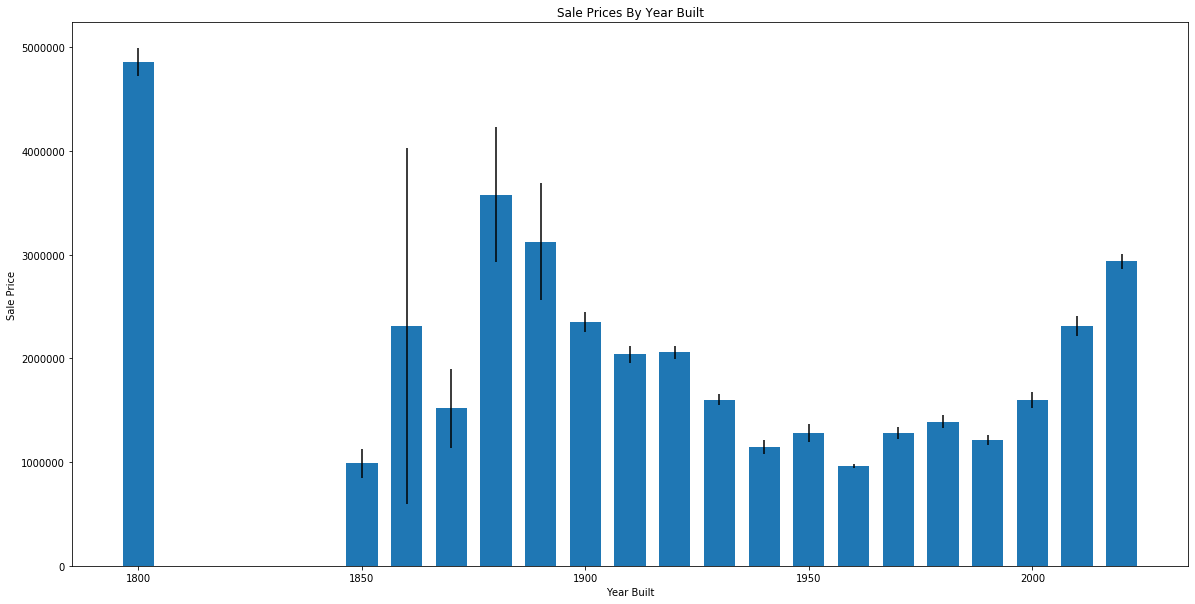

In [32]:
plt.figure(figsize = (20,10))
plt.bar(YEAR_BUILT["YEAR BUILT"],YEAR_BUILT[" SALE PRICE "],yerr = YEAR_BUILT1, width = 7)
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.title("Sale Prices By Year Built")

As predicted, there is a bimodel pattern here. There is also a discernable trend over time, so I expect that this will be a good predictor of price.

Text(0.5, 1.0, 'Sale Prices By Tax Class At Sale')

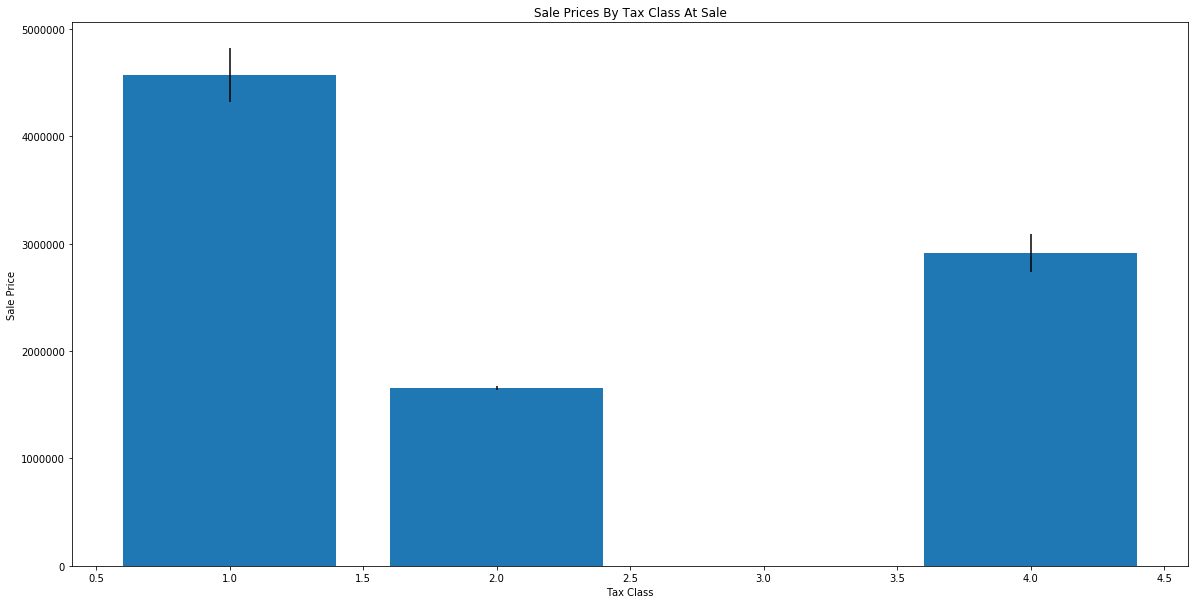

In [33]:
plt.figure(figsize = (20,10))
plt.bar(TAX_CLASS_AT_TIME_OF_SALE["TAX CLASS AT TIME OF SALE"],TAX_CLASS_AT_TIME_OF_SALE[" SALE PRICE "],yerr = TAX_CLASS_AT_TIME_OF_SALE1)
plt.xlabel("Tax Class")
plt.ylabel("Sale Price")
plt.title("Sale Prices By Tax Class At Sale")

There is little variance, which indicates that this is a good predictor of price.

Text(0.5, 1.0, 'Sale Prices By Building Class At Sale')

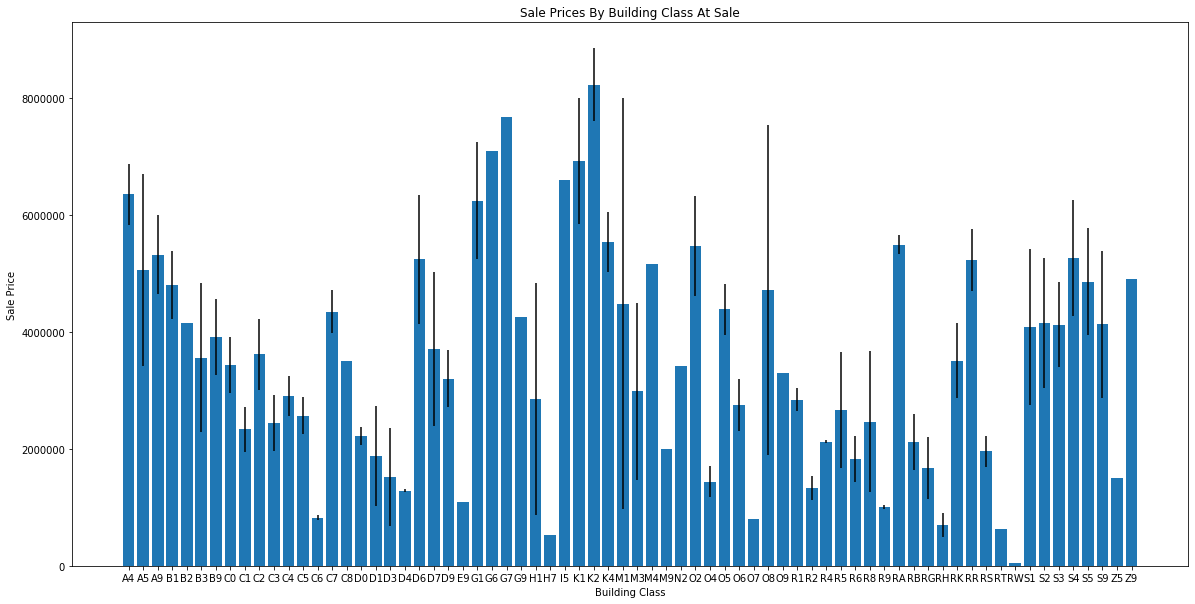

In [34]:
plt.figure(figsize = (20,10))
plt.bar(BUILDING_CLASS_AT_TIME_OF_SALE["BUILDING CLASS AT TIME OF SALE"],BUILDING_CLASS_AT_TIME_OF_SALE[" SALE PRICE "],yerr = BUILDING_CLASS_AT_TIME_OF_SALE1)
plt.xlabel("Building Class")
plt.ylabel("Sale Price")
plt.title("Sale Prices By Building Class At Sale")

As we can see, there is relatively low variance in this category, so it is likely a good predictor.

To recap, we will make use of these categories:

- Neighborhood

- Tax Class At Sale

- Building Class At Sale

- Year Built

- Tax Class

- Building Class Category

- Land Square Feet

I will also assume that these characteristics apply to predicting the prices of Bronx homes. If I see a significant change in RMS deviation when applying the random forest learner to the Bronx.

# RQ2.3

Now we detect multicollinearity. To do this, we will use will map dummy variables to our non-numerical charateristics, these are: neighborhood, building class at sale, tax class at sale, building class category, year built, tax class.

In [35]:
#pandas does something similar, but it does not play well with VIF analysis
def create_dummy_variables(column):
    variable_numbers = []
    variable_names = []
    variable_number = 0
    column_index = 0
    for variable in column:
        if variable in variable_names:
            index = variable_names.index(variable)
            column[column_index] = variable_numbers[index]
        else:
            variable_names.append(variable)
            variable_numbers.append(variable_number)
            column[column_index] = variable_number
            variable_number += 1
        column_index += 1
    return column

In [36]:
#now we create a pandas dataframe of the things we wish to preform a multicolinearity analysis
#on
Analysis_df = pd.DataFrame()
Analysis_df["neighborhood"] = manhatten_2020["NEIGHBORHOOD"]
Analysis_df["tax class at sale"] = manhatten_2020["TAX CLASS AT TIME OF SALE"]
Analysis_df["building class at sale"] = manhatten_2020["BUILDING CLASS AT TIME OF SALE"]
Analysis_df["year built"] = manhatten_2020["YEAR BUILT"]
Analysis_df["tax class at present"] = manhatten_2020["TAX CLASS AT PRESENT"]
Analysis_df["building class category"] = manhatten_2020["BUILDING CLASS CATEGORY"]
#Analysis_df["sale price"] = manhatten_2020[" SALE PRICE "]
#now that we have built our new datframe, we can create dummy variables then 

Analysis_df = Analysis_df.reset_index()
#this resets the index for the function we will be preforming later

Analysis_df['neighborhood'] = create_dummy_variables(Analysis_df['neighborhood'])

Analysis_df['building class at sale'] = create_dummy_variables(Analysis_df['building class at sale'])

Analysis_df['tax class at present'] = create_dummy_variables(Analysis_df['tax class at present'])

Analysis_df['tax class at sale'] = create_dummy_variables(Analysis_df['tax class at sale'])

Analysis_df['building class category'] = create_dummy_variables(Analysis_df['building class category'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pandas doesn't like what I did, but it worked. See the Dataframe below:

In [37]:
Analysis_df

,index,neighborhood,tax class at sale,building class at sale,year built,tax class at present,building class category
0,2,0,0.0,0,1900.0,0,0
1,4,0,1.0,1,1900.0,1,1
2,6,0,1.0,2,1920.0,2,1
3,7,0,1.0,2,1920.0,2,1
4,8,0,1.0,2,1920.0,2,1
...,...,...,...,...,...,...,...
7738,11955,38,1.0,6,1950.0,2,4
7739,11956,38,1.0,6,1950.0,2,4
7740,11960,38,2.0,69,1930.0,5,33
7741,11962,38,2.0,53,1960.0,5,27


In [38]:
Analysis_df = Analysis_df.drop(columns = "index")
Analysis_df = Analysis_df.dropna()

In [39]:
Analysis_df["neighborhood"] = Analysis_df["neighborhood"].apply(float)
Analysis_df["tax class at sale"] = Analysis_df["tax class at sale"].apply(float)
Analysis_df["building class at sale"] = Analysis_df["building class at sale"].apply(float)
Analysis_df["year built"] = Analysis_df["year built"].apply(float)
Analysis_df["tax class at present"] = Analysis_df["tax class at present"].apply(float)
Analysis_df["building class category"] = Analysis_df["building class category"].apply(float)

In [40]:
#import our VIF analysis tool
from statsmodels.stats.outliers_influence import variance_inflation_factor
#create a new dataframe for our VIF values
VIF_df = Analysis_df
  
# VIF dataframe row names and features to analyze
VIF_result = pd.DataFrame() 
VIF_result["feature"] = VIF_df.columns 
  
# calculating VIF for each feature 
VIF_result["VIF"] = [variance_inflation_factor(VIF_df.values, i) for i in range(len(VIF_df.columns))] 

In [41]:
VIF_result

,feature,VIF
0,neighborhood,5.113401
1,tax class at sale,85.054888
2,building class at sale,4.659799
3,year built,34.011266
4,tax class at present,43.229789
5,building class category,8.379377


As we can see, there is a large VIF value for tax class at sale. I suspect that this is because it is very close to tax class at present. I will remove this value and apply the same test.

In [42]:
VIF_df = VIF_df.drop(columns = "tax class at sale")
  
# VIF dataframe 
VIF_result = pd.DataFrame() 
VIF_result["feature"] = VIF_df.columns 
  
# calculating VIF for each feature 
VIF_result["VIF"] = [variance_inflation_factor(VIF_df.values, i) for i in range(len(VIF_df.columns))] 

In [43]:
VIF_result

,feature,VIF
0,neighborhood,5.112042
1,building class at sale,4.430218
2,year built,17.805536
3,tax class at present,17.558281
4,building class category,8.057211


And now we have much lower (though still rather high) VIF measures. I will proceed with the features shown in the above dataframe.

In [44]:
Analysis_df = pd.DataFrame()
Analysis_df["neighborhood"] = bronx_2020["NEIGHBORHOOD"]
Analysis_df["tax class at sale"] = bronx_2020["TAX CLASS AT TIME OF SALE"]
Analysis_df["building class at sale"] = bronx_2020["BUILDING CLASS AT TIME OF SALE"]
Analysis_df["year built"] = bronx_2020["YEAR BUILT"]
Analysis_df["tax class at present"] = bronx_2020["TAX CLASS AT PRESENT"]
Analysis_df["building class category"] = bronx_2020["BUILDING CLASS CATEGORY"]

Analysis_df = Analysis_df.reset_index()
#this resets the index for the function we will be preforming later

Analysis_df['neighborhood'] = create_dummy_variables(Analysis_df['neighborhood'])

Analysis_df['building class at sale'] = create_dummy_variables(Analysis_df['building class at sale'])

Analysis_df['tax class at present'] = create_dummy_variables(Analysis_df['tax class at present'])

Analysis_df['tax class at sale'] = create_dummy_variables(Analysis_df['tax class at sale'])

Analysis_df['building class category'] = create_dummy_variables(Analysis_df['building class category'])

Analysis_df = Analysis_df.drop(columns = "index")
Analysis_df = Analysis_df.dropna()

Analysis_df["neighborhood"] = Analysis_df["neighborhood"].apply(float)
Analysis_df["tax class at sale"] = Analysis_df["tax class at sale"].apply(float)
Analysis_df["building class at sale"] = Analysis_df["building class at sale"].apply(float)
Analysis_df["year built"] = Analysis_df["year built"].apply(float)
Analysis_df["tax class at present"] = Analysis_df["tax class at present"].apply(float)
Analysis_df["building class category"] = Analysis_df["building class category"].apply(float)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
VIF_df = Analysis_df
VIF_df = VIF_df.drop(columns = "tax class at sale")
  
# VIF dataframe 
VIF_result = pd.DataFrame() 
VIF_result["feature"] = VIF_df.columns 
  
# calculating VIF for each feature 
VIF_result["VIF"] = [variance_inflation_factor(VIF_df.values, i) for i in range(len(VIF_df.columns))]
VIF_result

,feature,VIF
0,neighborhood,4.290840
1,building class at sale,5.623440
2,year built,5.359711
3,tax class at present,4.103308
4,building class category,3.325234


# RQ2.4
We find that we can reduce multicollinearity if we remove one of the tax classes. I chose to remove tax class at sale because it is not as specific as tax class at present, so I believe we will get better predictive results with it. You may also notice that I did not test the mulicollinearity of land square feet. This is because there are very few datapoints in land square feet. I will solve this problem later, but I do not want to use non-measured values in my multicollinearity analysis.

# RQ3.1
I beleive that a random forest learner will be the best regression model for this predictor. I will use the random forest predictor from sklearn, as well as some of sklearn's other data analysis tools. The data is heavily right skewed, so I will be applying a log in base 10 to sale price and year built.

I will run this analysis twice, one time with land square feet and another without. The first time I run it, I will do it without squared feet. When I preform this analysis I will also take the log10 of square feet. In order to fill the empty datapoints, I will train a random forest learner on all of the filled datapoint, then I will apply that rando forest learner to predict the square feet. Once the square feet datapoints are full, I will predict the price with the random forest learner.

In [46]:
manhatten_2020 = pd.read_csv("2020_manhattan.csv")
manhatten_2020_houseprices,manhatten_2020 = make_distribution(manhatten_2020," SALE PRICE ",5000,5000000)

#we create a seperate array to use with our predictor
Analysis_df = pd.DataFrame()
Analysis_df["neighborhood"] = manhatten_2020["NEIGHBORHOOD"]
Analysis_df["building class at sale"] = manhatten_2020["BUILDING CLASS AT TIME OF SALE"]
Analysis_df["year built"] = np.log10(manhatten_2020["YEAR BUILT"])
Analysis_df["tax class at sale"] = manhatten_2020["TAX CLASS AT TIME OF SALE"]
Analysis_df["building class category"] = manhatten_2020["BUILDING CLASS CATEGORY"]
Analysis_df["sale price"] = np.log10(manhatten_2020[" SALE PRICE "])
Analysis_df = Analysis_df.dropna()


#the function below one-hot encodes, which plays well with random forest regression by 
#seperating each unique label within a feature as a column. Suppose the neigborhood is
#clinton. There is a column for every unique neighborhood, and every column of that row
#which was a neighborhood would have a zero, but the clinton column would have a 1
Analysis_df = pd.get_dummies(Analysis_df)

Text(0.5, 1.0, 'Visualization of Price Prediction Error')

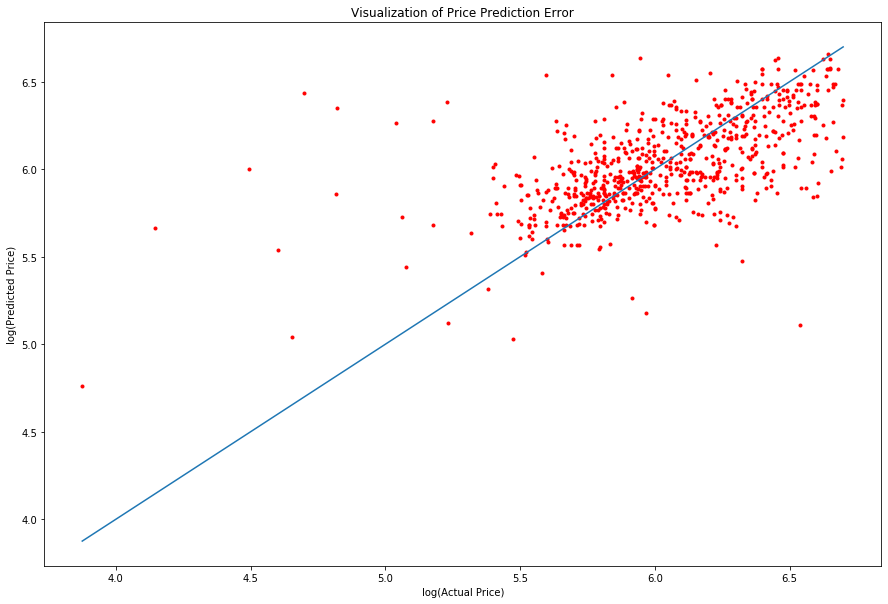

In [47]:
#the sale prices, what we want to predict
sale_price = np.array(Analysis_df['sale price'])


#columns which will be used in our analysis
prediction_columns = np.array(Analysis_df.drop(columns = "sale price",axis = 1))

#now we import from sklearn something which splits our data
from sklearn.model_selection import train_test_split

training, testing, train_price, test_price = train_test_split(prediction_columns, sale_price, test_size = 0.1)

#imports our random forest learner
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators = 100)
random_forest.fit(training,train_price)

price_predictions = random_forest.predict(testing)


def linear_function(x):
    return x
perfect_x = np.linspace(min(test_price),max(test_price),100)
perfect_y = linear_function(perfect_x)

plt.figure(figsize = (15,10))
plt.plot(test_price,price_predictions,"r.")
plt.plot(perfect_x,perfect_y)
plt.xlabel("log(Actual Price)")
plt.ylabel("log(Predicted Price)")
plt.title("Visualization of Price Prediction Error")

In [49]:
#imports rms calculator
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(test_price,price_predictions)

print("The root mean squared value for Manhatten price predictions is ",np.sqrt(rms))

The root mean squared value for Manhatten price predictions is  0.29242944296385526


In [50]:
bronx_2020 = pd.read_csv("2020_bronx.csv")
bronx_2020_houseprices,bronx_2020 = make_distribution(bronx_2020," SALE PRICE ",5000,5000000)


Analysis_df = pd.DataFrame()
Analysis_df["neighborhood"] = bronx_2020["NEIGHBORHOOD"]
Analysis_df["building class at sale"] = bronx_2020["BUILDING CLASS AT TIME OF SALE"]
Analysis_df["year built"] = np.log10(bronx_2020["YEAR BUILT"])
Analysis_df["tax class at sale"] = bronx_2020["TAX CLASS AT TIME OF SALE"]
Analysis_df["building class category"] = bronx_2020["BUILDING CLASS CATEGORY"]
Analysis_df["sale price"] = np.log10(bronx_2020[" SALE PRICE "])
Analysis_df = Analysis_df.dropna()


Analysis_df = pd.get_dummies(Analysis_df)

In [51]:
#the sale prices, what we want to predict
sale_price = np.array(Analysis_df['sale price'])


#columns which will be used in our analysis
prediction_columns = np.array(Analysis_df.drop(columns = "sale price",axis = 1))

#now we import from sklearn something which splits our data
from sklearn.model_selection import train_test_split

training, testing, train_price, test_price = train_test_split(prediction_columns, sale_price, test_size = 0.1)

Text(0.5, 1.0, 'Visualization of Price Prediction Error')

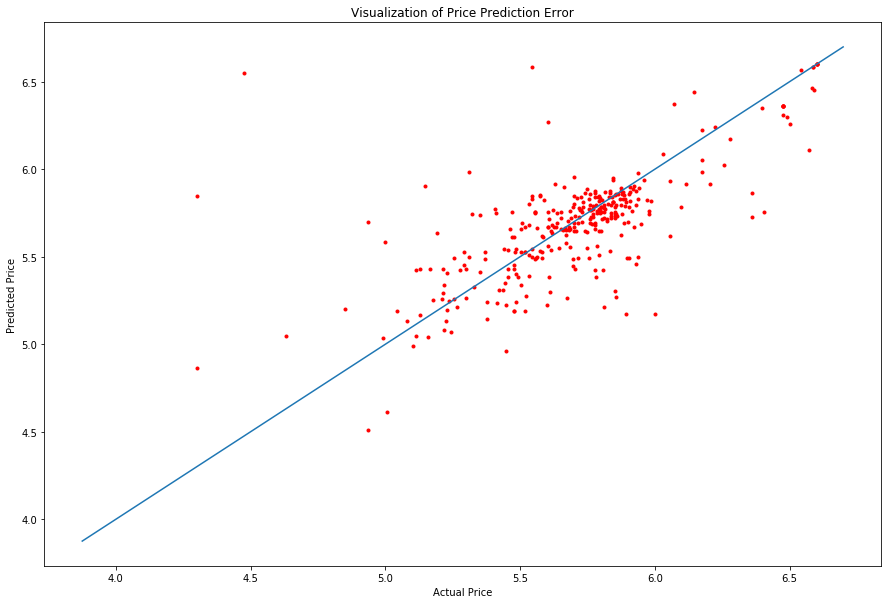

In [52]:
random_forest = RandomForestRegressor(n_estimators = 100)
random_forest.fit(training,train_price)

price_predictions = random_forest.predict(testing)

plt.figure(figsize = (15,10))
plt.plot(test_price,price_predictions,"r.")
plt.plot(perfect_x,perfect_y)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Visualization of Price Prediction Error")

In [53]:
rms = mean_squared_error(test_price,price_predictions)

print("The root mean squared value for Bronx price predictions is ",np.sqrt(rms))

The root mean squared value for Bronx price predictions is  0.2602888631679861


This RMS value is good, but I think we can make it better by adding land square feet.

In [54]:
manhatten_2020 = pd.read_csv("2020_manhattan.csv")
manhatten_2020_,manhatten_2020 = make_distribution(manhatten_2020," SALE PRICE ",5000,10000000)
Analysis_df = pd.DataFrame()


manhatten_2020["LAND SQUARE FEET"] = manhatten_2020["LAND SQUARE FEET"].apply(remove_commas)
manhatten_2020["LAND SQUARE FEET"] = manhatten_2020["LAND SQUARE FEET"].apply(float)
Analysis_df["land square feet"] = np.log10(manhatten_2020["LAND SQUARE FEET"])
Analysis_df["neighborhood"] = manhatten_2020["NEIGHBORHOOD"]
Analysis_df["building class at sale"] = manhatten_2020["BUILDING CLASS AT TIME OF SALE"]
Analysis_df["year built"] = np.log10(manhatten_2020["YEAR BUILT"])
Analysis_df["tax class at sale"] = manhatten_2020["TAX CLASS AT TIME OF SALE"]
Analysis_df["building class category"] = manhatten_2020["BUILDING CLASS CATEGORY"]
Analysis_df["building class category"] = manhatten_2020["BUILDING CLASS CATEGORY"]
#note that we have no sale price here

#get our dummies
learning_df = pd.get_dummies(Analysis_df)
Analysis_df = pd.get_dummies(Analysis_df)
#drops unfilled for learning
learning_df = learning_df.dropna()

#the square footage, what we want to predict
true_square_feet = np.array(learning_df['land square feet'])

learning_df = learning_df.drop(columns = ["land square feet"])

Analysis_df = Analysis_df.drop(columns = ["land square feet"])

Analysis_df = Analysis_df.dropna()


#dropping columns which will not be used in our analysis we will avoid price to keep
#bias out when running the random forest learner again
prediction_columns = np.array(Analysis_df)

random_forest = RandomForestRegressor(n_estimators = 100)
random_forest.fit(learning_df,true_square_feet)

sqfoot_predictions = random_forest.predict(prediction_columns)

Text(0.5, 1.0, 'Visualization of Price Prediction Error')

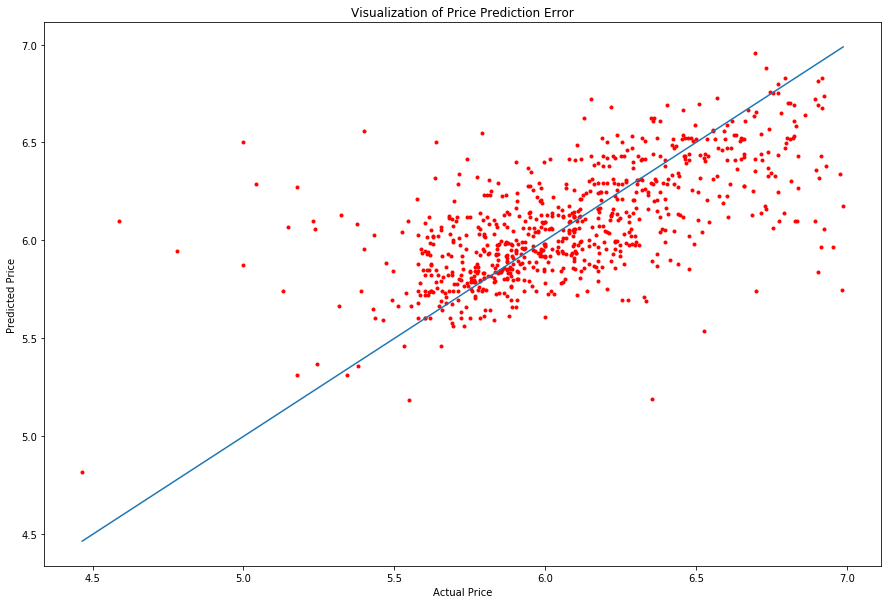

In [55]:
Analysis_df['square feet'] = sqfoot_predictions
Analysis_df["sale price"] = np.log10(manhatten_2020[" SALE PRICE "])
#the sale prices, what we want to predict
sale_price = np.array(Analysis_df['sale price'])

#columns which will be used in our analysis
prediction_columns = np.array(Analysis_df.drop(columns = "sale price",axis = 1))

#now we import from sklearn something which splits our data

training, testing, train_price, test_price = train_test_split(prediction_columns, sale_price, test_size = 0.1)

random_forest = RandomForestRegressor(n_estimators = 100)
random_forest.fit(training,train_price)

price_predictions = random_forest.predict(testing)

perfect_x = np.linspace(min(test_price),max(test_price),100)
perfect_y = linear_function(perfect_x)

plt.figure(figsize = (15,10))
plt.plot(test_price,price_predictions,"r.")
plt.plot(perfect_x,perfect_y)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Visualization of Price Prediction Error")

In [56]:
rms = mean_squared_error(test_price,price_predictions)

print("The root mean squared value for Manhatten price predictions is ",np.sqrt(rms))

The root mean squared value for Manhatten price predictions is  0.297353297209766


Our RMSE increased (at least when I ran it)! That is dissapointing. That being said, our initial RMSE was quite good already. Though I think it could get better if we had enough filled datapoints to predict the square footage with a high level of confidence. Overall, I think the predictor preformed quite well, but I wish we had some more complete data, because I think I could do better!